# Comment caractériser collectivement les entrainements selon les variations des marqueurs ?

L'idée principale est d'utiliser des techniques différentes pour caractériser les séances d'entrainement avec les données collectives. La pratique la plus courante étant d'agréger chaque marqueur avec la moyenne, la médiane ou autres, nous allons voir des méthodes qui prennent en compte chaque saisie (chaque ligne de la base de données)

### Nous allons voir 2 méthodes : la caractérisation de groupe et l'analyse factorielle des correspondances (AFC)
Les résultats sont issus de Tanagra. Il est possible de réaliser les deux processus sur Python, cependant Tanagra nous fournit des informations supplémentaires intéressantes (plus que sur R également). Et cela nous évite tous les calculs mathématiques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image
from IPython.display import display_html, display, HTML

#### Commençons avec la caractérisation de groupe

In [2]:
data = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_full.xlsx')

Sélectionnons une semaine d'entrainement et ajoutons quelques informations

In [3]:
data_week = data[data['numsemaine']==36].copy()
data_week = data_week.loc[(data_week['nomSeance']!='Repos') & (data_week['dateSeance'] <= '22/01/2021')]

dates_conditions = [(data_week['dateSeance']=='18/01/2021'),
                    (data_week['dateSeance']=='19/01/2021'),
                    (data_week['dateSeance']=='20/01/2021'),
                    (data_week['dateSeance']=='21/01/2021'),
                    (data_week['dateSeance']=='22/01/2021')]

day_results = ['D-4', 'D-3', 'D-2', 'D-1', 'G-day']

data_week['Day'] = np.select(dates_conditions, day_results)

Voyons les résultats obtenus sur Tanagra

In [4]:
d_1 = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_AFC_Sem36.xlsx', sheet_name='D-1')
d_2 = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_AFC_Sem36.xlsx', sheet_name='D-2')
d_3 = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_AFC_Sem36.xlsx', sheet_name='D-3')
d_4 = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_AFC_Sem36.xlsx', sheet_name='D-4')
g_d = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_AFC_Sem36.xlsx', sheet_name='G-day')

In [5]:
d4_styler = d_4.style.set_table_attributes("style='display:inline'").set_caption('D-4')
d3_styler = d_3.style.set_table_attributes("style='display:inline'").set_caption('D-3')
d2_styler = d_2.style.set_table_attributes("style='display:inline'").set_caption('D-2')
d1_styler = d_1.style.set_table_attributes("style='display:inline'").set_caption('D-1')
gd_styler = g_d.style.set_table_attributes("style='display:inline'").set_caption('G-day')

display_html(d4_styler._repr_html_() + d3_styler._repr_html_() + 
             d2_styler._repr_html_() + d1_styler._repr_html_() + gd_styler._repr_html_(), raw=True)

,Att - Desc,Test value,Group,Overral
0,intensitemoy_idx_act=+++++,0.690000,"[ 37,0 %] 70,8 %",0.374000
1,fatigue_idx_act=+++++,0.480000,"[ 35,5 %] 45,8 %",0.252000
2,technique_idx_act=+,0.420000,"[ 45,5 %] 20,8 %",0.089000
3,sommeil_idx_act=++++,0.240000,"[ 25,5 %] 50,0 %",0.382000
4,bienetre_idx_act=+++++,0.200000,"[ 50,0 %] 4,2 %",0.016000
5,viegroupe_idx_act=++,0.180000,"[ 21,0 %] 91,7 %",0.854000
,Att - Desc,Test value,Group,Overral
0,intensitemoy_idx_act=+,0.600000,"[ 53,8 %] 29,2 %",0.106000
1,intensitemoy_idx_act=++,0.580000,"[ 45,0 %] 37,5 %",0.163000
2,intensitemoy_idx_act=+++,0.510000,"[ 50,0 %] 25,0 %",0.098000


Nous gardons les 5 premiers marqueurs et leurs variations attribués caractérisant chaque journée.
Pour quelques exemples explicatifs : D-4 est caractérisée par une intensité moyenne et une fatigue d'activation/stimulation très élevée et une technique d'activation très faible etc.
D-1 est caractérisée par une intensité moyenne, une fatigue et un bien être d'activation faible et une technique d'activation élevée etc.

Les pourcentages nous donnent des informations de répartitions et proportions dans le groupe entier, les sous groupes (Day) etc. Des informations que nous retrouvons avec un tableau de contingence

#### Voyons maintenant l'analyse factorielle des correspondances (AFC) pour la semaine d'entrainement et le match séparement
Obtenons la table de contingence de la semaine

In [19]:
df_cont = data_week.melt(id_vars=['dateSeance', 'Day'], value_vars=[c for c in data_week.columns if '_idx_act' in c],
                             var_name='Marqueurs', value_name='Variation')
df_cont['Marqueurs'] = df_cont['Marqueurs'].str.split('_').str[0]

df_cont = df_cont[df_cont['Marqueurs']!='duree']
df_cont_sem = df_cont[df_cont['Day']!='G-day'].copy()

cont_sem = pd.crosstab(df_cont_sem.Marqueurs, df_cont_sem.Variation)
cont_sem

Variation,+,++,+++,++++,+++++
Marqueurs,,,,,
bienetre,4,82,0,11,1
confiancesoi,2,77,7,12,0
fatigue,7,24,13,33,21
intensitemoy,11,19,11,29,28
sommeil,12,51,2,32,1
technique,7,61,7,22,1
viegroupe,1,84,3,9,1
vigueur,12,55,6,24,1


Nous pouvons déjà interpréter quelques résultats avec cette table cependant avec un plus grand jeu de données (plus de marqueurs), la tâche devient plus compliquée. Et nous allons voir que l'AFC facilite l'interprétation aussi bien visuellement et avec des résultats précis.

Tout d'abord procédons un test d'indépendance du Chi-2 avec comme H0 : les marqueurs et les variations sont indépendantes

In [8]:
from scipy.stats import chi2_contingency

In [11]:
statistic, p, dof, ex = chi2_contingency(cont_sem)

print('Valeur statistisque du Chi2 : {}'.format(np.round(statistic, 2)))
print('p-value du Chi2 : {}'.format(np.round(p, 2)))

Valeur statistisque du Chi2 : 277.47
p-value du Chi2 : 0.0


Rejettons donc H0 (p-value < 0,01) et supposons une dépendance entre les marqueurs et leurs variations

Réalisons l'analyse des correspondances pour la semaine d'entrainement en choississant par défaut 2 axes factoriels pour une facilité de visualisation

In [13]:
eig_v = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_AFC_CTsem.xlsx', sheet_name='%_expl')
rows_coord = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_AFC_CTsem.xlsx', sheet_name='XY_rows')
cols_coord = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_AFC_CTsem.xlsx', sheet_name='XY_cols')

In [14]:
rows_styler = rows_coord.style.set_table_attributes("style='display:inline'").set_caption('Coord. Marqueurs')
cols_styler = cols_coord.style.set_table_attributes("style='display:inline'").set_caption('Coord. Variation')

display_html(rows_styler._repr_html_() + cols_styler._repr_html_(), raw=True)

,Values,Weight,Sq. Dist.,Inertia,coord 1,coord 2,ctr 1,ctr 2,cos 1,cos 2
0,intensitemoy,0.125000,1.027350,0.128420,0.995900,-0.142460,42.220000,5.490000,"0,97 (0,97)","0,02 (0,99)"
1,fatigue,0.125000,0.640290,0.080040,0.785740,-0.068630,26.280000,1.280000,"0,96 (0,96)","0,01 (0,97)"
2,sommeil,0.125000,0.172800,0.021600,-0.062740,0.396100,0.170000,42.480000,"0,02 (0,02)","0,91 (0,93)"
3,vigueur,0.125000,0.089890,0.011240,-0.101850,0.263120,0.440000,18.740000,"0,12 (0,12)","0,77 (0,89)"
4,viegroupe,0.125000,0.327930,0.040990,-0.514610,-0.248670,11.270000,16.740000,"0,81 (0,81)","0,19 (1,00)"
5,confiancesoi,0.125000,0.224240,0.028030,-0.422620,-0.166340,7.600000,7.490000,"0,80 (0,80)","0,12 (0,92)"
6,bienetre,0.125000,0.293960,0.036740,-0.499710,-0.135230,10.630000,4.950000,"0,85 (0,85)","0,06 (0,91)"
7,technique,0.125000,0.054820,0.006850,-0.180100,0.102120,1.380000,2.820000,"0,59 (0,59)","0,19 (0,78)"
,Values,Weight,Sq. Dist.,Inertia,coord 1,coord 2,ctr 1,ctr 2,cos 1,cos 2
0,+++++,0.068880,2.374490,0.163550,1.470410,-0.435470,50.720000,28.290000,"0,91 (0,91)","0,08 (0,99)"


Nous avons plusieurs informations pour les marqueurs d'un côté et les variations de l'autre : les coordonnées sur les 2 axes factoriels, la contribution (%) de chaque modalité dans les axes factoriels ou encore la qualité de représentation de chaque modalité sur les axes (cos²)

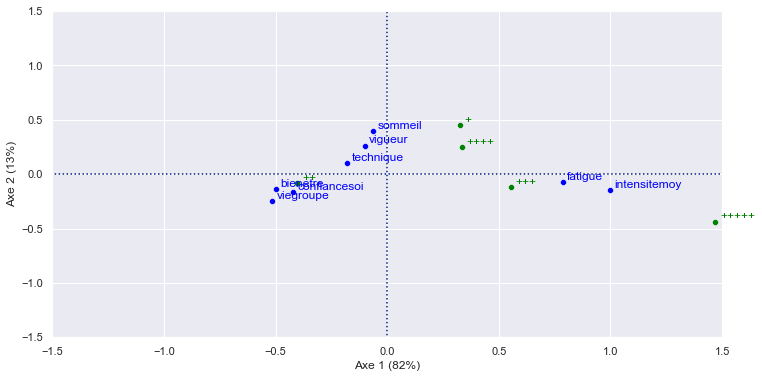

In [15]:
plt.figure(figsize=(12,6))
sns.set(palette= 'dark')

sns.scatterplot(data=rows_coord, x='coord 1', y ='coord 2', color='blue')
sns.scatterplot(data=cols_coord, x='coord 1', y ='coord 2', color='green')

for i, m in enumerate(rows_coord['Values']):
    plt.text(rows_coord.loc[i, 'coord 1']+0.02, rows_coord.loc[i, 'coord 2']+0.02, m, color='blue')
for i, v in enumerate(cols_coord['Values']):
    plt.text(cols_coord.loc[i, 'coord 1']+0.02, cols_coord.loc[i, 'coord 2']+0.02, v, color='green') 

plt.xlabel('Axe 1 (%s%%)' % str(eig_v.loc[0, '% explained'])[:4].lstrip('0.'))
plt.ylabel('Axe 2 (%s%%)' % str(eig_v.loc[1, '% explained'])[:4].lstrip('0.'))

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.axvline(0, -3.5, 3.5).set_linestyle(':')
plt.axhline(0, -5, 5).set_linestyle(':')

Nous pouvons observer quelques tendances : princpalement que l'intensité moyenne et la très haute activation s'attirent ; de même pour la vie de groupe, le bien-être, la confiance et la faible activation. Et donc à l'inverse l'intensité moyenne et la faible activation se répulsent...

Tanagra nous fournit davantage d'informations à ce sujet, permettant une meilleure lecture et interprétation du graph

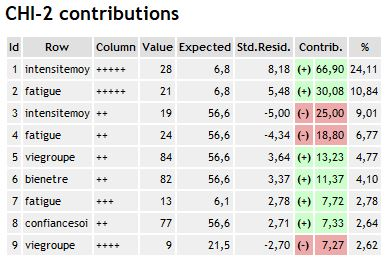

In [16]:
Image(filename='C:/Users/raflg/Downloads/Databases/AFC/X²_contributions_sem.jpg')

Nous voyons que les deux principales attractions sont l'intensité moyenne, la fatigue et la très haute activation (+67% et + 30%) et les principales répulsions, toujours l'intensité moyenne, la fatigue et la faible activation (-25% et -19%). Egalement la vie de groupe, le bien être, la confiance en soi et la faible activation s'attirent

A l'aide du graph et du tableau ci-dessus, on peut donc caractériser la semaine d'entrainement comme une semaine à fortes sollicitations d'intensité moyenne et de fatigue et une faible activation (faible amélioration) de la confiance en soi, du bien être et de la vie de groupe

Voyons à présent pour le match

In [20]:
df_cont_match = df_cont[df_cont['Day']=='G-day'].copy()

cont_match = pd.crosstab(df_cont_match.Marqueurs, df_cont_match.Variation)
cont_match

Variation,+,++,+++,++++,+++++
Marqueurs,,,,,
bienetre,1,21,0,2,1
confiancesoi,0,21,2,2,0
fatigue,2,5,2,6,10
intensitemoy,2,1,1,3,18
sommeil,1,7,2,15,0
technique,4,17,1,3,0
viegroupe,0,21,1,2,1
vigueur,2,13,2,6,2


In [21]:
statistic, p, dof, ex = chi2_contingency(cont_match)

print('Valeur statistisque du Chi2 : {}'.format(np.round(statistic, 2)))
print('p-value du Chi2 : {}'.format(np.round(p, 2)))

Valeur statistisque du Chi2 : 148.47
p-value du Chi2 : 0.0


In [23]:
eig_v_m = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_AFC_CTmatch.xlsx', sheet_name='%_expl')
rows_coord_m = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_AFC_CTmatch.xlsx', sheet_name='XY_rows')
cols_coord_m = pd.read_excel('C:/Users/raflg/Downloads/TLP/equipeB_AFC_CTmatch.xlsx', sheet_name='XY_cols')

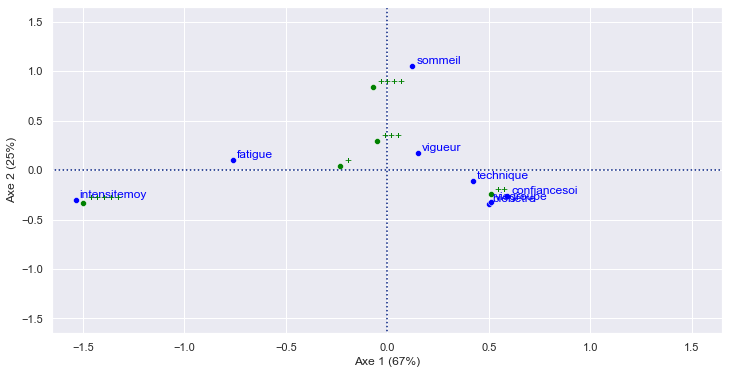

In [24]:
plt.figure(figsize=(12,6))
sns.set(palette= 'dark')

sns.scatterplot(data=rows_coord_m, x='coord 1', y ='coord 2', color='blue')
sns.scatterplot(data=cols_coord_m, x='coord 1', y ='coord 2', color='green')

for i, m in enumerate(rows_coord_m['Values']):
    plt.text(rows_coord_m.loc[i, 'coord 1']+0.02, rows_coord_m.loc[i, 'coord 2']+0.02, m, color='blue')
for i, v in enumerate(cols_coord_m['Values']):
    plt.text(cols_coord_m.loc[i, 'coord 1']+0.02, cols_coord_m.loc[i, 'coord 2']+0.02, v, color='green') 

plt.xlabel('Axe 1 (%s%%)' % str(eig_v_m.loc[0, '% explained'])[:4].lstrip('0.'))
plt.ylabel('Axe 2 (%s%%)' % str(eig_v_m.loc[1, '% explained'])[:4].lstrip('0.'))

plt.xlim(-1.65, 1.65)
plt.ylim(-1.65, 1.65)
plt.axvline(0, -3.5, 3.5).set_linestyle(':')
plt.axhline(0, -5, 5).set_linestyle(':')

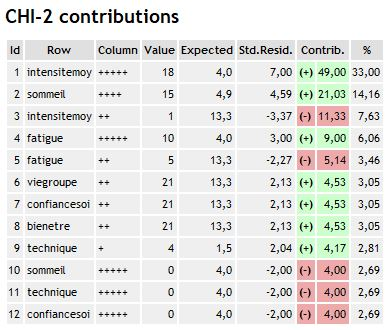

In [26]:
Image(filename='C:/Users/raflg/Downloads/Databases/AFC/X²_contributions_match.jpg')

Nous voyons bien que l'intensité moyenne et la très haute activation s'attirent ; le sommeil et la haute activation s'attirent ; et la vie de groupe, la confiance en soi, le bien être la faible activation s'attirent.
<br>Des informations très semblables voire identiques  que celles obtenues lors de la caractérisation de groupe

### Et si un simple graph en barre pouvait suffir ?

Text(0.5, 1.0, "Semaine d'entrainement")

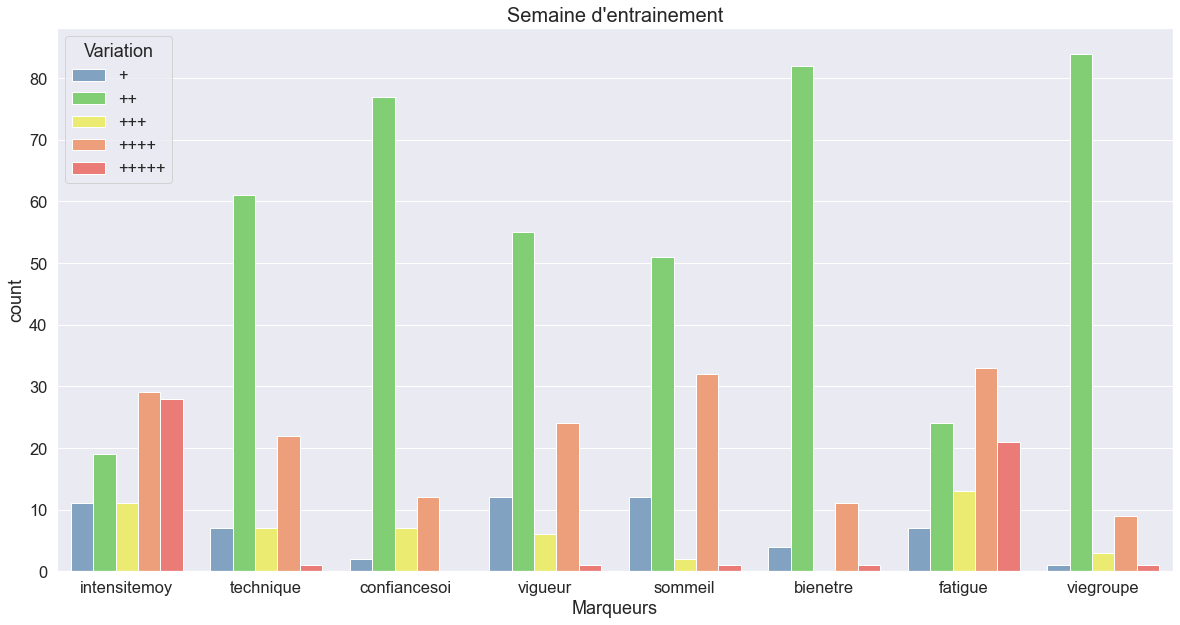

In [32]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, palette= 'dark')
sns.countplot(x='Marqueurs', data=df_cont_sem, hue='Variation', hue_order=['+', '++', '+++', '++++', '+++++'],
              palette=['#78A2CC', '#77DD66', '#ffff5e', '#FF9967', '#FF6962'])
plt.title("Semaine d'entrainement", fontsize = 20)

In [34]:
cont_sem['Mode'] = cont_sem.idxmax(axis=1)
cont_sem

Variation,+,++,+++,++++,+++++,Mode
Marqueurs,,,,,,
bienetre,4,82,0,11,1,++
confiancesoi,2,77,7,12,0,++
fatigue,7,24,13,33,21,++++
intensitemoy,11,19,11,29,28,++++
sommeil,12,51,2,32,1,++
technique,7,61,7,22,1,++
viegroupe,1,84,3,9,1,++
vigueur,12,55,6,24,1,++


Text(0.5, 1.0, 'Game day')

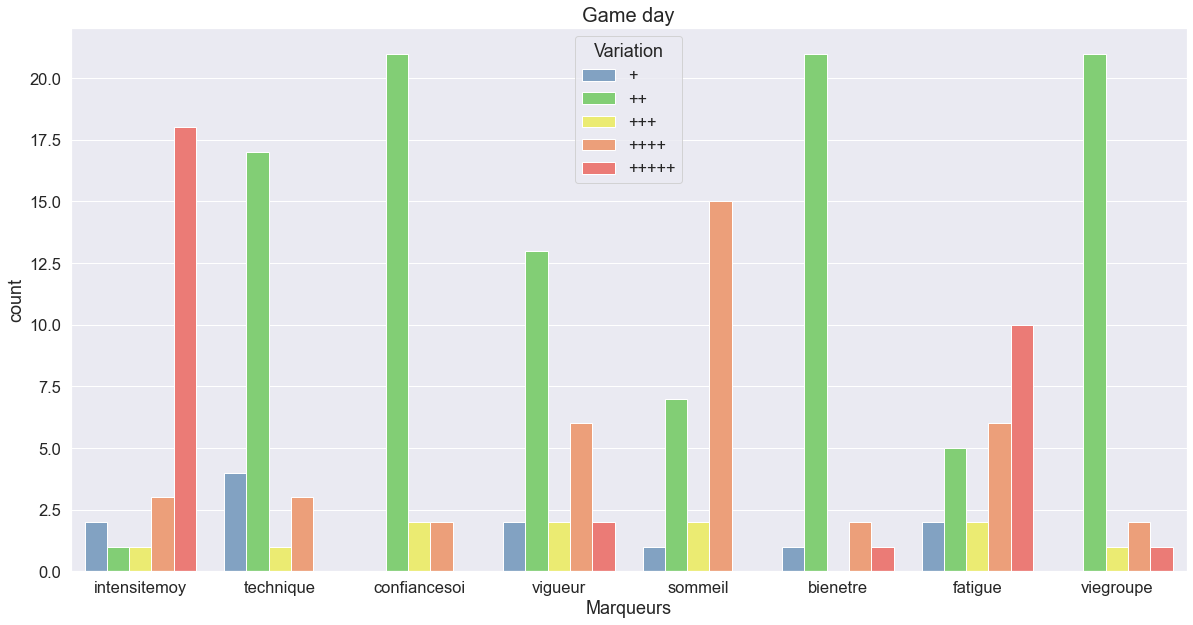

In [33]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5, palette= 'dark')
sns.countplot(x='Marqueurs', data=df_cont_match, hue='Variation', hue_order=['+', '++', '+++', '++++', '+++++'],
              palette=['#78A2CC', '#77DD66', '#ffff5e', '#FF9967', '#FF6962'])
plt.title('Game day', fontsize = 20)

In [30]:
cont_match['Mode'] = cont_match.idxmax(axis=1)
cont_match

Variation,+,++,+++,++++,+++++,Mode
Marqueurs,,,,,,
bienetre,1,21,0,2,1,++
confiancesoi,0,21,2,2,0,++
fatigue,2,5,2,6,10,+++++
intensitemoy,2,1,1,3,18,+++++
sommeil,1,7,2,15,0,++++
technique,4,17,1,3,0,++
viegroupe,0,21,1,2,1,++
vigueur,2,13,2,6,2,++


Nous distinguons très bien les modes de chaque marqueurs (comme dans les tables de contingence). Cependant l'AFC permet une visualisation peut être plus simple de l'information et une validation statistique de ce qui peut paraître évident au premier coup d'oeil.
<br>Rappelons également que dans l'exemple ici nous avons 8 marqueurs et 5 niveaux d'activation. Augmenter la taille de l'un et/ou de l'autre rendrait le graph en barre beaucoup plus chargé...Ou encore si nous obtenons des distributions bimodales...

### Conclusion

Nous pouvons voir qu'avec plusieurs méthodes nous obtenons des résultats semblables avec plus ou moins d'informations supplémentaires. A l'image du monde de l'entrainement nous offrant plusieurs méthodes d'entrainement, les données nous en offrent également plusieurs. A chacun de choisir celle qui répond le mieux au contexte.
<br>Et n'oublions pas qu'il n'y a pas de mauvaise recette, il y a uniquement de mauvais cuisiniers